In [1]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Explore Shared Articles Data

In [2]:
df2 = pd.read_csv("shared_articles.csv")

In [3]:
df2.shape

(3122, 13)

In [4]:
df2.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
timestamp          3122 non-null int64
eventType          3122 non-null object
contentId          3122 non-null int64
authorPersonId     3122 non-null int64
authorSessionId    3122 non-null int64
authorUserAgent    680 non-null object
authorRegion       680 non-null object
authorCountry      680 non-null object
contentType        3122 non-null object
url                3122 non-null object
title              3122 non-null object
text               3122 non-null object
lang               3122 non-null object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [6]:
df2.shape


(3122, 13)

In [7]:
df2.isnull().sum()

timestamp             0
eventType             0
contentId             0
authorPersonId        0
authorSessionId       0
authorUserAgent    2442
authorRegion       2442
authorCountry      2442
contentType           0
url                   0
title                 0
text                  0
lang                  0
dtype: int64

In [8]:
df2.describe()

,timestamp,contentId,authorPersonId,authorSessionId
count,3.122000e+03,3.122000e+03,3.122000e+03,3.122000e+03
mean,1.468804e+09,3.284110e+16,3.984819e+17,1.976675e+17
std,7.571512e+06,5.383734e+18,4.387115e+18,5.403753e+18
min,1.459193e+09,-9.222795e+18,-9.120686e+18,-9.212055e+18
25%,1.462369e+09,-4.660869e+18,-1.578288e+18,-4.651280e+18
50%,1.467136e+09,4.436584e+16,-7.092877e+17,4.154103e+17
75%,1.473873e+09,4.745617e+18,3.609194e+18,4.841644e+18
max,1.488308e+09,9.222265e+18,9.210531e+18,9.221043e+18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1852f908>,
      dtype=object)

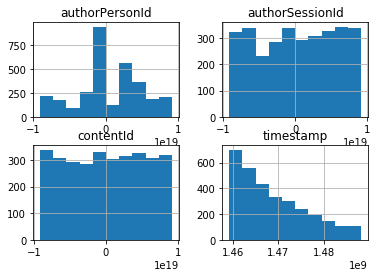

In [9]:
import matplotlib as plt
df2.hist()


# Explore User Interactions Data

In [10]:
df1 = pd.read_csv("users_interactions.csv")

In [11]:
df1.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
timestamp      72312 non-null int64
eventType      72312 non-null object
contentId      72312 non-null int64
personId       72312 non-null int64
sessionId      72312 non-null int64
userAgent      56918 non-null object
userRegion     56907 non-null object
userCountry    56918 non-null object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


In [13]:
df1.shape

(72312, 8)

In [14]:
df1.isnull().sum()

timestamp          0
eventType          0
contentId          0
personId           0
sessionId          0
userAgent      15394
userRegion     15405
userCountry    15394
dtype: int64

In [15]:
df1.describe()

,timestamp,contentId,personId,sessionId
count,7.231200e+04,7.231200e+04,7.231200e+04,7.231200e+04
mean,1.470103e+09,-3.033423e+16,1.252026e+16,3.421273e+16
std,7.258130e+06,5.344755e+18,5.022333e+18,5.344355e+18
min,1.457964e+09,-9.222795e+18,-9.223122e+18,-9.222505e+18
25%,1.464876e+09,-4.726309e+18,-3.596627e+18,-4.613476e+18
50%,1.468343e+09,1.893099e+16,-1.088422e+17,5.029492e+16
75%,1.474461e+09,4.441012e+18,3.766319e+18,4.667962e+18
max,1.488310e+09,9.222265e+18,9.210531e+18,9.223314e+18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ca35390>,
      dtype=object)

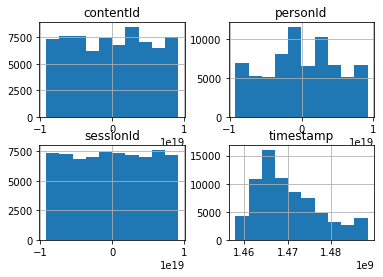

In [16]:
df1.hist()

# Joined Table Exploration

**Merge Dataframes** 

- Join on the contentID column which exists in both tables.

In [45]:
# Merge two Dataframes on single column 'ID'
df = df2.merge(df1, on='contentId')

In [46]:
#limit to content shared 
df = df[df['eventType_x'] == 'CONTENT SHARED']

In [47]:
df.shape

(72269, 20)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72269 entries, 0 to 72268
Data columns (total 20 columns):
timestamp_x        72269 non-null int64
eventType_x        72269 non-null object
contentId          72269 non-null int64
authorPersonId     72269 non-null int64
authorSessionId    72269 non-null int64
authorUserAgent    15109 non-null object
authorRegion       15109 non-null object
authorCountry      15109 non-null object
contentType        72269 non-null object
url                72269 non-null object
title              72269 non-null object
text               72269 non-null object
lang               72269 non-null object
timestamp_y        72269 non-null int64
eventType_y        72269 non-null object
personId           72269 non-null int64
sessionId          72269 non-null int64
userAgent          56877 non-null object
userRegion         56866 non-null object
userCountry        56877 non-null object
dtypes: int64(7), object(13)
memory usage: 11.6+ MB


In [49]:
df.isnull().sum()

timestamp_x            0
eventType_x            0
contentId              0
authorPersonId         0
authorSessionId        0
authorUserAgent    57160
authorRegion       57160
authorCountry      57160
contentType            0
url                    0
title                  0
text                   0
lang                   0
timestamp_y            0
eventType_y            0
personId               0
sessionId              0
userAgent          15392
userRegion         15403
userCountry        15392
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a8d5978>,
      dtype=object)

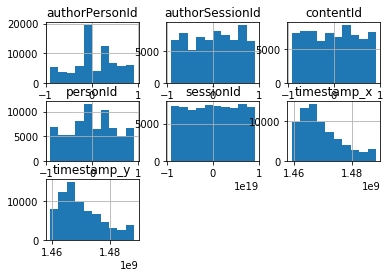

In [50]:
df.hist()

# Munging and Wrangling


In [51]:
df.head(2)

,timestamp_x,eventType_x,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang,timestamp_y,eventType_y,personId,sessionId,userAgent,userRegion,userCountry
0,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459270471,VIEW,2873028073541627603,-3228450896145227905,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,SP,BR
1,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,1459539433,VIEW,8414731042150985013,4543899740167763020,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


**Weighting Event Types**

Not all types of interactions are equally important in determining user preferences. We need to determine how to weight each of the interaction types form the 'eventType' column to determine user 'Score'. 

Things to consider, may want to come back and tweak this:
- Some recommender systems are based on rating and some on summed scores. 
- implicit vs explicit feedback

In [76]:
event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 3.0, 
   'BOOKMARK': 3.5, 
   'FOLLOW': 4.0,
   'COMMENT CREATED': 2.0,  
}

df['event_strength'] = df['eventType_y'].apply(lambda x: event_type_strength[x])

In [77]:
df.head()

,timestamp_x,eventType_x,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,...,lang,timestamp_y,eventType_y,personId,sessionId,userAgent,userRegion,userCountry,eventStrength,event_strength
0,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,...,en,1459270471,VIEW,2873028073541627603,-3228450896145227905,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,SP,BR,1.0,1.0
1,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,...,en,1459539433,VIEW,8414731042150985013,4543899740167763020,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR,1.0,1.0
2,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,...,en,1459476271,VIEW,-7267769888748948232,-1350132153769633851,Android - Native Mobile App,MG,BR,1.0,1.0
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,...,en,1459476266,VIEW,-7267769888748948232,-1350132153769633851,Android - Native Mobile App,MG,BR,1.0,1.0
4,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,...,en,1459476139,LIKE,-7267769888748948232,-1350132153769633851,NaN,NaN,NaN,3.0,3.0


**Mitigating Cold-Start**

It it impossible to recommend products to users who have had few product interactions so far because we don't yet know their preferences. We can mitigate this 'cold start' issue by limiting to only users who have had more than 5 interactions.

In [78]:
interactions_count_df = df.groupby(['personId', 'contentId']).size().groupby('personId').size()

print(f'Total Users: {len(interactions_count_df)}')
interactions_count_df.head()

Total Users: 1895


personId
-9223121837663643404    43
-9212075797126931087     5
-9207251133131336884     7
-9199575329909162940    11
-9196668942822132778     7
dtype: int64

In [79]:
#Limit the users to only those with more than five interactions 

limited_interactions_count_df = interactions_count_df[interactions_count_df >= 5].reset_index()[['personId']]

In [80]:
#All users with more than five interactions 

print(f'Total Users 5 or More Interactions: {len(limited_interactions_count_df)}')

limited_interactions_count_df.head()

Total Users 5 or More Interactions: 1139


,personId
0,-9223121837663643404
1,-9212075797126931087
2,-9207251133131336884
3,-9199575329909162940
4,-9196668942822132778


In [81]:
#Merge with full df with interactions df to get only those people who have five or more interactions from the full joined table above

selected_user_interactions_df = df.merge(limited_interactions_count_df, 
               how = 'right',
               left_on = 'personId',
               right_on = 'personId')

print('# of interactions from users with at least 5 interactions: %d' % len(selected_user_interactions_df))

# of interactions from users with at least 5 interactions: 69820


**Log Transform**

To mitigate the fact that some users are likely to interact with specific articles much more heavily than others (and so would skew the results) we need to normalize by applying a log transformation.

In [82]:
#math.log(a,Base) where a = The numeric value and Base = Base to which the logarithm has to be computed.

import math

def log_user_performance(x):
    return math.log(1+x, 2)



In [83]:
#Apply the log transformation to the full df. It will contain only the columns below with the formatted event strength column

total_interactions_df = selected_user_interactions_df.groupby(['personId', 'contentId'])['event_strength'].sum().apply(log_user_performance).reset_index()

print('# of unique user/item interactions: %d' % len(total_interactions_df))

# of unique user/item interactions: 39075


In [84]:
total_interactions_df.head()

,personId,contentId,event_strength
0,-9223121837663643404,-8949113594875411859,1.000000
1,-9223121837663643404,-8377626164558006982,1.000000
2,-9223121837663643404,-8208801367848627943,1.000000
3,-9223121837663643404,-8187220755213888616,1.000000
4,-9223121837663643404,-7423191370472335463,3.169925


# Save as CSV

Combined dataset for modeling

In [86]:
total_interactions_df.to_csv(r'full_interactions_dataset.csv')